In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [78]:
df_aligned = pd.read_excel("ScoreCardData_Autos_MOM_Bucket - Copy.xlsx")



In [79]:
df_aligned.head(75)

,PRK,OpenDate,ProductCat,Bucket Jan-20,Bucket Feb-20,Bucket Mar-20,Bucket Apr-20,Bucket May-20,Bucket Jun-20,Bucket Jul-20,...,Bucket Apr-24,Bucket May-24,Bucket Jun-24,Bucket Jul-24,Bucket Aug-24,Bucket Sep-24,Bucket Oct-24,Bucket Nov-24,Bucket Dec-24,Bucket Jan-25
0,2266-EA4-200101583446,2020-01-02,Autos,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2266-EA4-200101596722,2020-01-02,Autos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,5000-IA5-200101584407,2020-01-02,DM Loan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5000-IA6-200101569112,2020-01-02,DM Loan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000-IA6-200101581426,2020-01-02,DM Loan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2266-EA4-200101597889,2020-01-09,Autos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2266-EA4-200101595969,2020-01-09,Autos,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,2266-EA4-200101598088,2020-01-09,Autos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
73,2266-EA4-200101585381,2020-01-09,Autos,0.0,0.0,0.0,1.0,30.0,60.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [80]:
# Rename columns: keep first 3, rename the rest as M1, M2, ...
cols = df_aligned.columns.tolist()
num_cols_to_rename = len(cols) - 3
new_names = [f'M{i+1}' for i in range(num_cols_to_rename)]
df_aligned.columns = cols[:3] + new_names





In [81]:
df_aligned.head(76)

,PRK,OpenDate,ProductCat,M1,M2,M3,M4,M5,M6,M7,...,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61
0,2266-EA4-200101583446,2020-01-02,Autos,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2266-EA4-200101596722,2020-01-02,Autos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,5000-IA5-200101584407,2020-01-02,DM Loan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5000-IA6-200101569112,2020-01-02,DM Loan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000-IA6-200101581426,2020-01-02,DM Loan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2266-EA4-200101595969,2020-01-09,Autos,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,2266-EA4-200101598088,2020-01-09,Autos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
73,2266-EA4-200101585381,2020-01-09,Autos,0.0,0.0,0.0,1.0,30.0,60.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
74,2266-EA4-200101591579,2020-01-09,Autos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cols_to_update = df_aligned.columns[3:]

df_aligned[cols_to_update] = df_aligned[cols_to_update].apply(lambda X:np.where( X.isna(), np.nan, np.where(X >= 60,1,0)))

In [83]:
df_aligned[cols_to_update].head(2396)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Step 4: Propagate 1s to the right once a 1 is encountered
def propagate_until_blank(row):
    activate = False
    new_row = row.copy()
    for i in range(len(new_row)):
        if pd.isna(new_row.iloc[i]):
            # Stop if you hit a true blank (NaN) — optional, based on your need
            # But your original logic didn't stop at NaN, so we keep going
            pass
        if new_row.iloc[i] == 1:
            activate = True
        if activate and not pd.isna(new_row.iloc[i]):
            new_row.iloc[i] = 1
        # If you want to propagate even into NaN positions, remove the `and not pd.isna(...)` above
    return new_row

In [85]:
# Apply propagation
df_aligned[cols_to_update] = df_aligned[cols_to_update].apply(propagate_until_blank, axis=1)

In [88]:
def left_align_row(row):
# Keep only non-null values (NaN, None, pd.NA)
   non_null = row.dropna().values
# Create an object array filled with NaN (as object)
   aligned = np.full(len(row), np.nan, dtype=object)
# Place non-null values at the beginning
   aligned[:len(non_null)] = non_null
   return pd.Series(aligned, index=row.index)
df_aligned[cols_to_update]  = df_aligned[cols_to_update] .apply(left_align_row, axis=1)

In [89]:
df_aligned[cols_to_update].head(56500)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56494,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56495,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56496,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56497,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Create new Series for the summary rows, including an index label
sum_row_series = pd.Series(df_aligned[cols_to_update].sum(), name='Sum')
count_row_series = pd.Series(df_aligned[cols_to_update].count(), name='Count')

# Combine the summary rows into a new DataFrame
summary_df = pd.DataFrame([sum_row_series, count_row_series])

# Append the summary rows to the original DataFrame
df_with_summary = pd.concat([df_aligned[cols_to_update], summary_df])

print("\nDataFrame with summary rows:")
print(df_with_summary)



DataFrame with summary rows:
            M1       M2       M3       M4       M5       M6       M7       M8  \
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2          0.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
56496      0.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
56497      0.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
56498      0.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Sum       82.0     77.0     82.0    155.0    194.0    230.0    253.0    274.0   
Count  56492.0  53492.0  50870.0  48864.0  47295.0  46017.0  44705.0  43565.0  

In [92]:
 # Transpose the summary_df
transposed_summary_df = summary_df.T 
Bad = transposed_summary_df['Sum']
Count = transposed_summary_df['Count']

transposed_summary_df

,Sum,Count
M1,82.0,56492.0
M2,77.0,53492.0
M3,82.0,50870.0
M4,155.0,48864.0
M5,194.0,47295.0
...,...,...
M57,78.0,902.0
M58,61.0,790.0
M59,56.0,668.0
M60,43.0,447.0


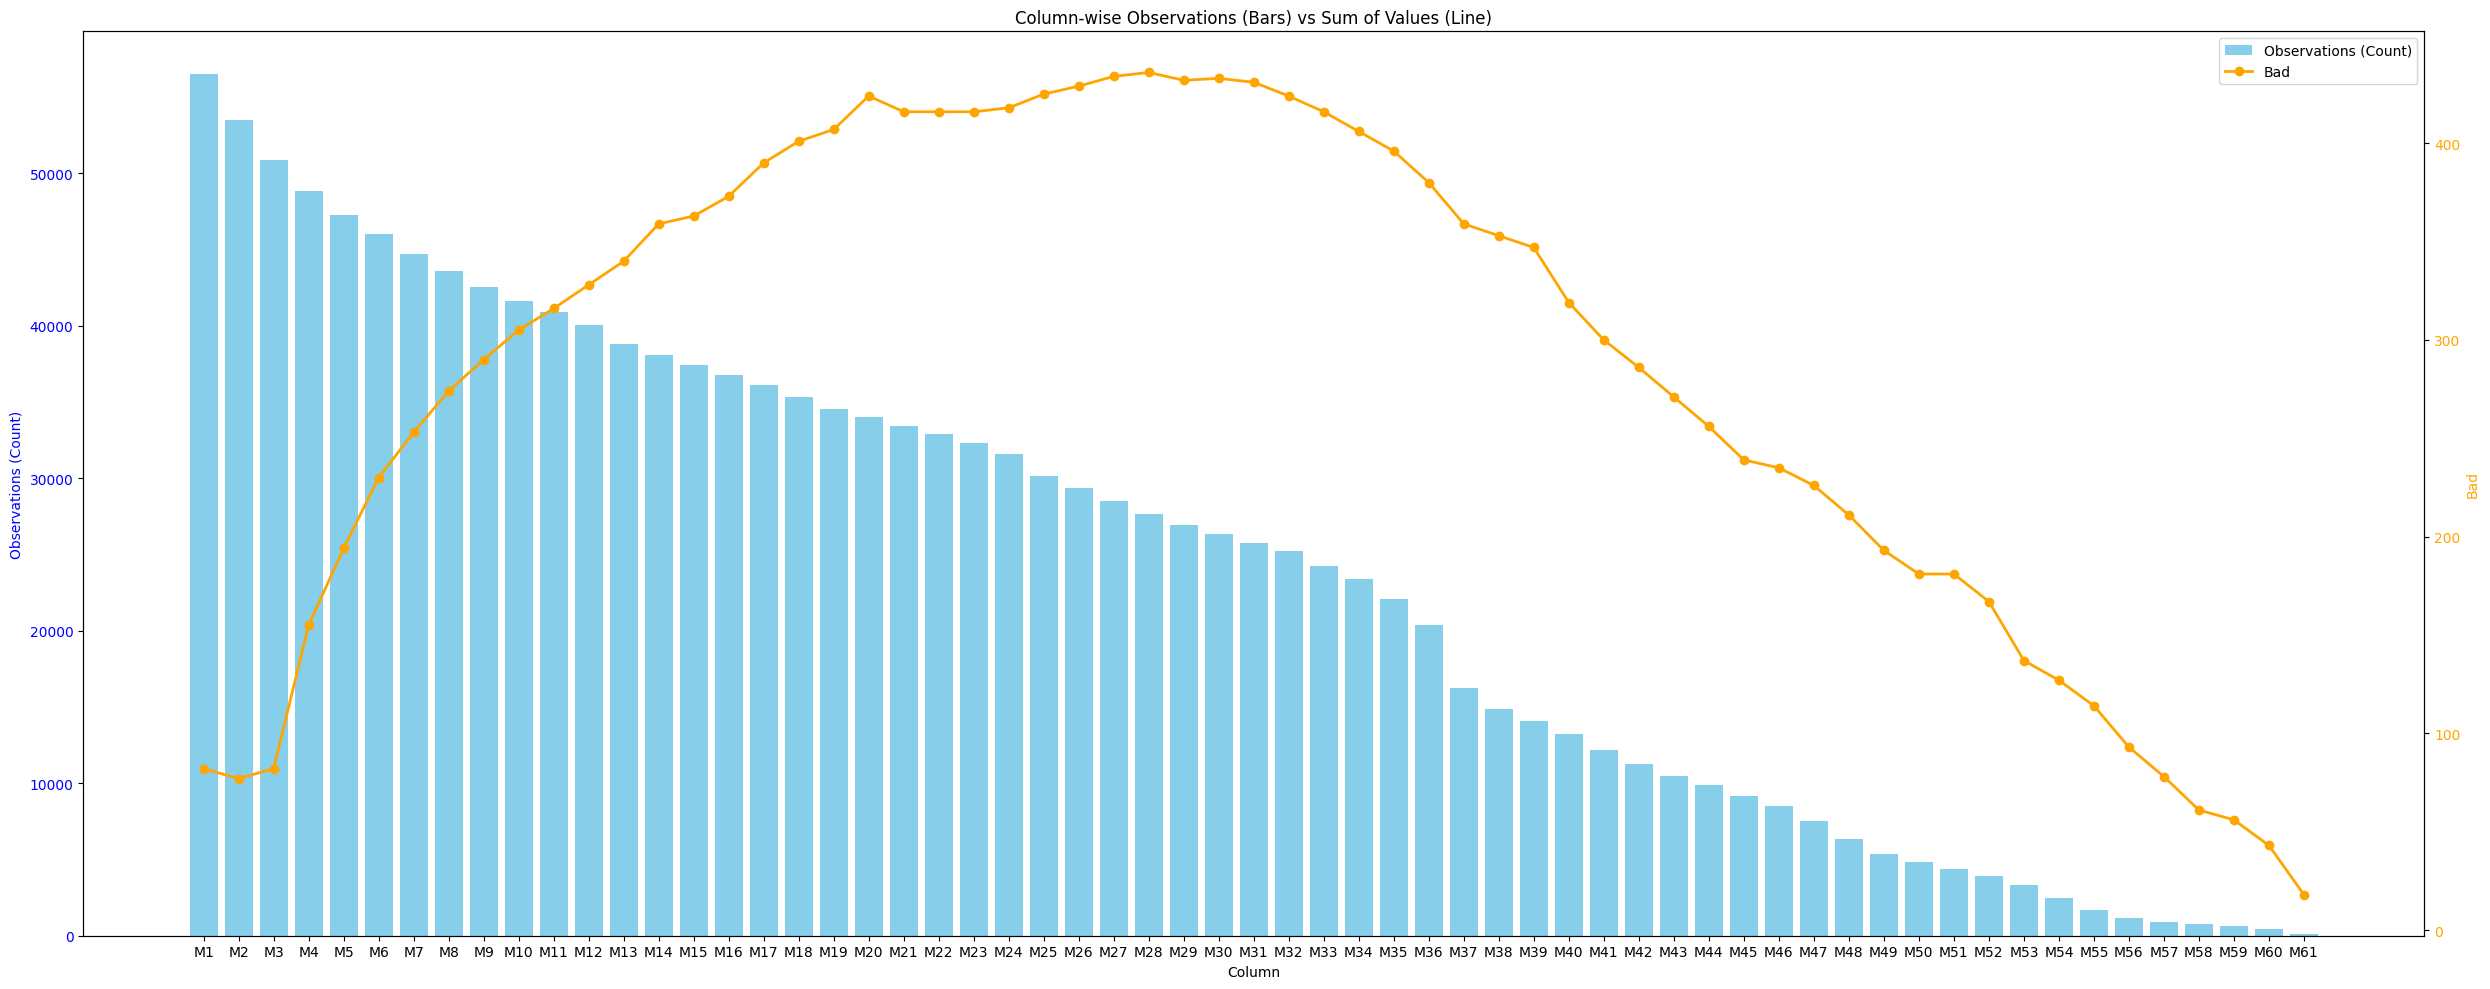

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Start from summary_transposed (index = column names, cols = ['Sum', 'Count'])
# Filter out "bad" columns if desired (e.g., Count == 1)
# summary_plot = summary_transposed[summary_transposed['Count'] > 1]
summary_plot = transposed_summary_df.copy()

# Sort by Count (descending) — or use 'Sum' if preferred
summary_plot = summary_plot.sort_values(by='Count', ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(25, 10))

# Bars: Count (Total Observations per column)
bars = ax1.bar(summary_plot.index, summary_plot['Count'], color='skyblue', label='Observations (Count)')
ax1.set_ylabel('Observations (Count)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line: Sum (Total of Values per column)
ax2 = ax1.twinx()
line = ax2.plot(summary_plot.index, summary_plot['Sum'], color='orange', marker='o', linestyle='-', linewidth=2, label='Bad')
ax2.set_ylabel('Bad', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Labels & title
plt.title('Column-wise Observations (Bars) vs Sum of Values (Line)')
ax1.set_xlabel('Column')
plt.xticks(rotation=45, ha='right')

# Optional: add legend
# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()